<a href="https://colab.research.google.com/github/LeslyeHdz13/PCD/blob/main/AnalisisDeTexto_Libro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD AUTÓNOMA DE NUEVO LEÓN**

 FACULTAD DE CIENCIAS FÍSICO MATEMÁTICAS


---


MAESTRÍA EN CIENCIAS DE DATOS

PROCESAMIENTO Y CLASIFICACIÓN DE DATOS

---


*1819111 LESLYE MARISOL HERNANDEZ BOLAÑOS*

### Objetivo

**Objetivo:**


Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex; si no en Markdown como readme.md del repositorio).

Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.




**Fuente de datos:** *The Project Gutenberg*  

- **Descripción:** The Project Gutenberg eBook of Little Women
- **Enlace:** https://www.gutenberg.org/cache/epub/514/pg514-images.html
- **Enfoque:** Analisis de texto

## Extracción


In [7]:
#Instalación de librerias externas
! pip install beautifulsoup4
! pip install requests
!pip install gutenbergpy

In [8]:
import gutenbergpy.textget

In [9]:
#Función para obtener el libro "Little Women"
def obtener_libro(id = 514):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [10]:
#Extraemos el libro
libro_limpio, libro = obtener_libro()


Impresión de las primeras palabras del libro "Mujercitas"


In [11]:
print(libro[:100]) #Con encabezados
libro_limpio[:1000] #Sin encabezados

b'The Project Gutenberg eBook of Little Women, by Louisa May Alcott\r\n\r\nThis eBook is for the use of an'


b'\n\n\n\nLittle Women\n\nby Louisa May Alcott\n\n\nContents\n\n PART 1\n CHAPTER ONE PLAYING PILGRIMS\n CHAPTER TWO A MERRY CHRISTMAS\n CHAPTER THREE THE LAURENCE BOY\n CHAPTER FOUR BURDENS\n CHAPTER FIVE BEING NEIGHBORLY\n CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL\n CHAPTER SEVEN AMY\xe2\x80\x99S VALLEY OF HUMILIATION\n CHAPTER EIGHT JO MEETS APOLLYON\n CHAPTER NINE MEG GOES TO VANITY FAIR\n CHAPTER TEN THE P.C. AND P.O.\n CHAPTER ELEVEN EXPERIMENTS\n CHAPTER TWELVE CAMP LAURENCE\n CHAPTER THIRTEEN CASTLES IN THE AIR\n CHAPTER FOURTEEN SECRETS\n CHAPTER FIFTEEN A TELEGRAM\n CHAPTER SIXTEEN LETTERS\n CHAPTER SEVENTEEN LITTLE FAITHFUL\n CHAPTER EIGHTEEN DARK DAYS\n CHAPTER NINETEEN AMY\xe2\x80\x99S WILL\n CHAPTER TWENTY CONFIDENTIAL\n CHAPTER TWENTY-ONE LAURIE MAKES MISCHIEF, AND JO MAKES PEACE\n CHAPTER TWENTY-TWO PLEASANT MEADOWS\n CHAPTER TWENTY-THREE AUNT MARCH SETTLES THE QUESTION\n\n PART 2\n CHAPTER TWENTY-FOUR GOSSIP\n CHAPTER TWENTY-FIVE THE FIRST WEDDING\n CHAPTER TWENTY-SI

Tipo de dato

In [21]:
type(libro_limpio)

bytes

Descodificamos el texto

In [278]:
str_libro = libro_limpio.decode()
#str_libro[]

Separación del texto

In [279]:
list_libro = str_libro.split("\n")
list_libro[:20]

['',
 '',
 '',
 '',
 'Little Women',
 '',
 'by Louisa May Alcott',
 '',
 '',
 'Contents',
 '',
 ' PART 1',
 ' CHAPTER ONE PLAYING PILGRIMS',
 ' CHAPTER TWO A MERRY CHRISTMAS',
 ' CHAPTER THREE THE LAURENCE BOY',
 ' CHAPTER FOUR BURDENS',
 ' CHAPTER FIVE BEING NEIGHBORLY',
 ' CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL',
 ' CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION',
 ' CHAPTER EIGHT JO MEETS APOLLYON']

In [280]:
libro_fil = list(filter(None, list_libro))
libro_fil[:20]

['Little Women',
 'by Louisa May Alcott',
 'Contents',
 ' PART 1',
 ' CHAPTER ONE PLAYING PILGRIMS',
 ' CHAPTER TWO A MERRY CHRISTMAS',
 ' CHAPTER THREE THE LAURENCE BOY',
 ' CHAPTER FOUR BURDENS',
 ' CHAPTER FIVE BEING NEIGHBORLY',
 ' CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL',
 ' CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION',
 ' CHAPTER EIGHT JO MEETS APOLLYON',
 ' CHAPTER NINE MEG GOES TO VANITY FAIR',
 ' CHAPTER TEN THE P.C. AND P.O.',
 ' CHAPTER ELEVEN EXPERIMENTS',
 ' CHAPTER TWELVE CAMP LAURENCE',
 ' CHAPTER THIRTEEN CASTLES IN THE AIR',
 ' CHAPTER FOURTEEN SECRETS',
 ' CHAPTER FIFTEEN A TELEGRAM',
 ' CHAPTER SIXTEEN LETTERS']

In [281]:
libro_fil

['Little Women',
 'by Louisa May Alcott',
 'Contents',
 ' PART 1',
 ' CHAPTER ONE PLAYING PILGRIMS',
 ' CHAPTER TWO A MERRY CHRISTMAS',
 ' CHAPTER THREE THE LAURENCE BOY',
 ' CHAPTER FOUR BURDENS',
 ' CHAPTER FIVE BEING NEIGHBORLY',
 ' CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL',
 ' CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION',
 ' CHAPTER EIGHT JO MEETS APOLLYON',
 ' CHAPTER NINE MEG GOES TO VANITY FAIR',
 ' CHAPTER TEN THE P.C. AND P.O.',
 ' CHAPTER ELEVEN EXPERIMENTS',
 ' CHAPTER TWELVE CAMP LAURENCE',
 ' CHAPTER THIRTEEN CASTLES IN THE AIR',
 ' CHAPTER FOURTEEN SECRETS',
 ' CHAPTER FIFTEEN A TELEGRAM',
 ' CHAPTER SIXTEEN LETTERS',
 ' CHAPTER SEVENTEEN LITTLE FAITHFUL',
 ' CHAPTER EIGHTEEN DARK DAYS',
 ' CHAPTER NINETEEN AMY’S WILL',
 ' CHAPTER TWENTY CONFIDENTIAL',
 ' CHAPTER TWENTY-ONE LAURIE MAKES MISCHIEF, AND JO MAKES PEACE',
 ' CHAPTER TWENTY-TWO PLEASANT MEADOWS',
 ' CHAPTER TWENTY-THREE AUNT MARCH SETTLES THE QUESTION',
 ' PART 2',
 ' CHAPTER TWENTY-FOUR GOSSIP',
 ' CHAPTER TW

## Análisis exploratorio



In [282]:
type(libro_fil)

list

## Estadistíca descriptiva

In [32]:
len(libro_fil)


16504

In [283]:
# Longitud de cada texto
import pandas as pd
df_libro_fil=pd.DataFrame( libro_fil, columns=['text'])


,67
text,"“perhaps never,” but each silently added it, t..."
long,67
total_palabras,11
processed_text,perhaps never silently added thinking father far


In [284]:

df_libro_fil['long'] = df_libro_fil['text'].apply(len)

# Número de palabras
df_libro_fil['total_palabras'] = df_libro_fil['text'].apply(lambda x: len(x.split()))

# Resumen estadístico
print(df_libro_fil[['long', 'total_palabras']].describe())

               long  total_palabras
count  16504.000000    16504.000000
mean      59.764178       11.276781
std       17.558014        3.701438
min        3.000000        1.000000
25%       63.000000       10.000000
50%       68.000000       12.000000
75%       70.000000       14.000000
max       71.000000       19.000000


In [285]:
df_libro_fil.tail(2)

,text,long,total_palabras
16502,"“Oh, my girls, however long you may live, I never can wish you a",64,14
16503,greater happiness than this!”,29,4


In [286]:
#Gráfico ¿Cuáles productos contienen más palabras?
from collections import Counter
# Eliminar etiquetas HTML y stopwords
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Tokenizar palabras

def eliminar_stop_words(text):
    # Eliminar etiquetas HTML usando expresiones regulares
    text_sin_html = re.sub(r'<br\s*/?>|<p.*?>|</?\w+>', '', text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    palabras = word_tokenize(text_sin_html.lower())  # Tokenizar el texto limpio
    palabras_filtradas = [palabra for palabra in palabras if palabra.isalnum() and palabra.lower() not in stop_words]

    return ' '.join(palabras_filtradas)

df_libro_fil['processed_text'] = df_libro_fil['text'].fillna('').astype(str).apply(eliminar_stop_words)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


##  Frecuencia de palabras

In [38]:
from collections import Counter

# Tokenizar palabras
all_words = ' '.join(df_libro_fil['processed_text']).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))

       word  frequency
32       jo       1359
133    said        826
0    little        724
9       one        713
36      meg        683
28      amy        650
62   laurie        596
238    like        583
23     beth        465
185   would        444


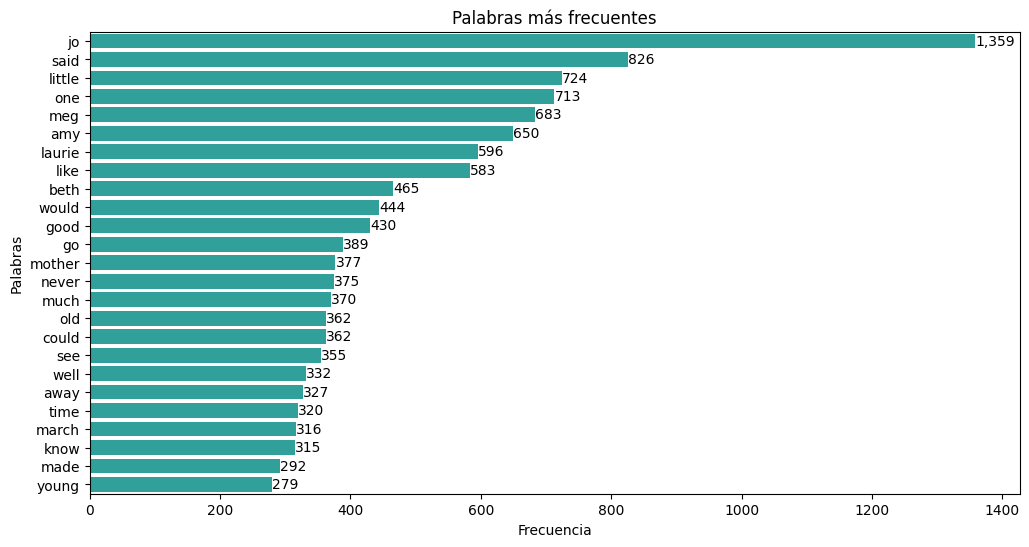

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Gráfica de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_words, x='frequency', y='word', color='lightseagreen')

# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

# Título y etiquetas
plt.title('Palabras más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.show()

##Frecuencia en signos de puntuación

In [287]:
#Signos de puntuación
# Contar signos de puntuación
df_libro_fil['punctuation_count'] = df_libro_fil['text'].apply(lambda x: len(re.findall(r"[^\w\s]|'", x)))
print(df_libro_fil['punctuation_count'].describe())

count    16504.000000
mean         2.546534
std          1.682706
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         11.000000
Name: punctuation_count, dtype: float64


In [145]:
import string

# Texto de ejemplo
texto = ' '.join( df_libro_fil['text'])

# Obtener los signos de puntuación del texto
signos_puntuacion = [caracter for caracter in texto if caracter in string.punctuation]

# Mostrar los signos de puntuación encontrados en el texto
unique_signos_puntuacion = set(signos_puntuacion)

#Contar cuantas veces aparace cada signo
signos_puntuacion_count = {signo: signos_puntuacion.count(signo) for signo in unique_signos_puntuacion}
signos_puntuacion_count2 = {signo: signos_puntuacion.count(signo) for signo in unique_signos_puntuacion}

#print("Signos de puntuación en el texto:", signos_puntuacion.unique)

In [146]:
unique_signos_puntuacion

df_signos=pd.DataFrame(signos_puntuacion_count.items(), columns=['signos', 'frequency']).sort_values(by='frequency', ascending=False)

#signos_puntuacion_count.sort_values(by='frequency', ascending=False)


In [147]:
df_signos

,signos,frequency
6,",",18889
0,.,8948
11,?,865
5,!,746
3,-,612
10,_,106
9,;,38
2,(,26
12,),26
4,:,15


In [148]:
signos_puntuacion_count

{'.': 8948,
 '$': 1,
 '(': 26,
 '-': 612,
 ':': 15,
 '!': 746,
 ',': 18889,
 '&': 1,
 ']': 1,
 ';': 38,
 '_': 106,
 '?': 865,
 ')': 26,
 '[': 1}

In [149]:
signos_puntuacion_count2.pop('.')

signos_puntuacion_count2.pop(',')


signos_puntuacion_count2.pop('!')

signos_puntuacion_count2.pop('?')

865

In [114]:
signos_puntuacion_count2


{'$': 1,
 '(': 26,
 '-': 612,
 ':': 15,
 '&': 1,
 ']': 1,
 ';': 38,
 '_': 106,
 ')': 26,
 '[': 1}

In [150]:
signos_puntuacion_count2.pop('-')
signos_puntuacion_count2.pop('_')

106

In [115]:
#Contar cuantas veces aparace cada signo
signos_puntuacion_count

{'.': 8948,
 '$': 1,
 '(': 26,
 '-': 612,
 ':': 15,
 '!': 746,
 ',': 18889,
 '&': 1,
 ']': 1,
 ';': 38,
 '_': 106,
 '?': 865,
 ')': 26,
 '[': 1}

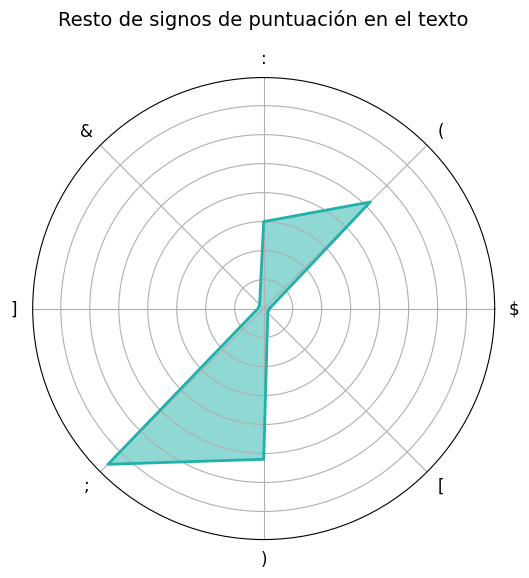

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import string

# Paso 2: Preparar los datos para el gráfico radar
# Extraer los signos y sus frecuencias
signos = list(signos_puntuacion_count2.keys())
frecuencias = list(signos_puntuacion_count2.values())

# Número de categorías (signos)
num_vars = len(signos)

# Asegurarse de que el gráfico sea un círculo completo (cerrar la forma)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetir el primer valor para cerrar el círculo
frecuencias += frecuencias[:1]
angles += angles[:1]

# Paso 3: Crear el gráfico radar
fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

# Crear el gráfico
ax.fill(angles, frecuencias, color='lightseagreen', alpha=0.5)
ax.plot(angles, frecuencias, color='lightseagreen', linewidth=2)

# Configurar las etiquetas
ax.set_yticklabels([])  # No mostrar etiquetas en el eje radial
ax.set_xticks(angles[:-1])  # Establecer las ubicaciones de las categorías
ax.set_xticklabels(signos, fontsize=12)

# Título
ax.set_title('Resto de signos de puntuación en el texto\n\n', size=14, color='black')

# Mostrar el gráfico
plt.show()

Agregar el conteo en la gráfica

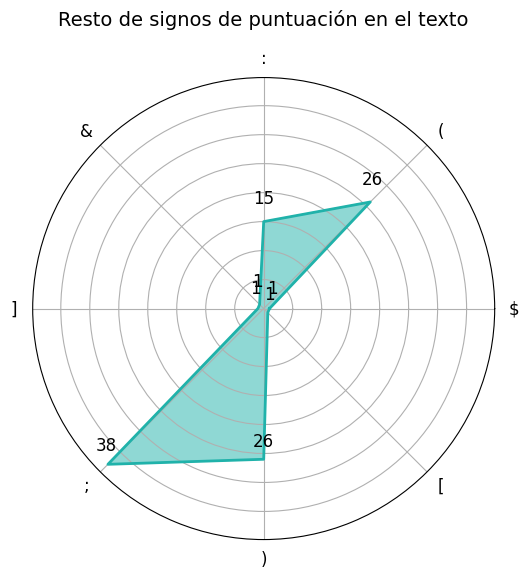

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import string

# Ejemplo de un diccionario de conteo de signos de puntuación

# Paso 2: Preparar los datos para el gráfico radar
# Extraer los signos y sus frecuencias
signos = list(signos_puntuacion_count2.keys())
frecuencias = list(signos_puntuacion_count2.values())

# Número de categorías (signos)
num_vars = len(signos)

# Asegurarse de que el gráfico sea un círculo completo (cerrar la forma)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetir el primer valor para cerrar el círculo
frecuencias += frecuencias[:1]
angles += angles[:1]

# Paso 3: Crear el gráfico radar
fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

# Crear el gráfico
ax.fill(angles, frecuencias, color='lightseagreen', alpha=0.5)
ax.plot(angles, frecuencias, color='lightseagreen', linewidth=2)

# Configurar las etiquetas
ax.set_yticklabels([])  # No mostrar etiquetas en el eje radial
ax.set_xticks(angles[:-1])  # Establecer las ubicaciones de las categorías
ax.set_xticklabels(signos, fontsize=12)

# Agregar los conteos a cada sección del radar
for i in range(len(signos)):
    ax.text(angles[i], frecuencias[i] + 0.5, str(frecuencias[i])+"\n\n",
            ha='center', va='center', fontsize=12, color='black')

# Título
ax.set_title('Resto de signos de puntuación en el texto\n\n', size=14, color='black')

# Mostrar el gráfico
plt.show()


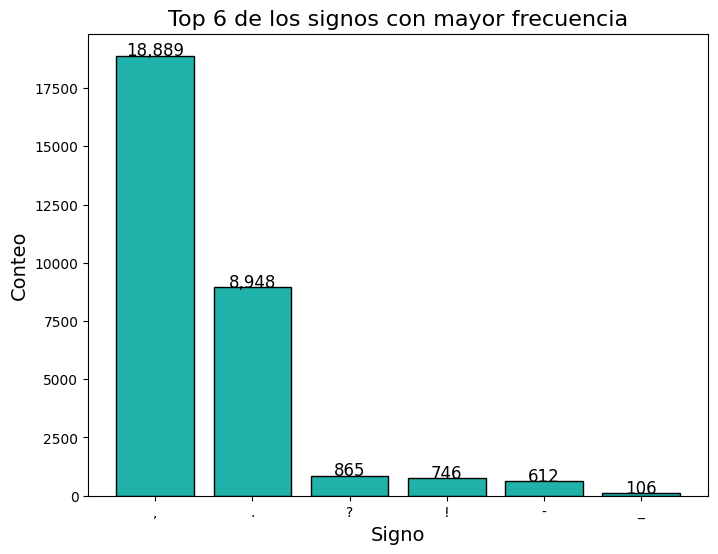

In [139]:
# Crear un gráfico de barras
#Top 6
df_signos_top = df_signos.head(6)

plt.figure(figsize=(8, 6))
plt.bar(df_signos_top['signos'], df_signos_top['frequency'], color='lightseagreen', edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 6 de los signos con mayor frecuencia', fontsize=16)
plt.xlabel('Signo', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

# Mostrar los valores sobre las barras encima
for i, val in enumerate(df_signos_top['frequency']):
     plt.text(i, val + 1 ,f"{int(val):,}", ha='center', fontsize=12)
# Mostrar el gráfico
plt.show()


## Emojis

In [155]:
!pip install emoji
import emoji


# Función para extraer emojis
#def extract_emojis(text):
 #   return ''.join(c for c in text if c in emoji.EMOJI_DATA )

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA and not c.isdigit())


# Aplicar función
df_libro_fil['emojis'] = df_libro_fil['text'].apply(extract_emojis)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
df_libro_fil[["emojis", "text"]].sort_values(by="emojis", ascending=False ).head(10)

,emojis,text
0,,Little Women
10960,,"get the worst of it, for you are as silly as t..."
10994,,"sing to me. I’m dying for some music, and alwa..."
10995,,"“I’d rather stay here, thank you.”"
10996,,"“Well, you can’t, there isn’t room. Go and mak..."
10997,,you are too big to be ornamental. I thought yo...
10998,,"woman’s apron string?” retorted Jo, quoting ce..."
10999,,his own.
11000,,"“Ah, that depends on who wears the apron!” and..."
11001,,tweak at the tassel.


In [183]:
df_libro_fil

,text,long,total_palabras,processed_text,emojis
0,Little Women,12,2,little women,
1,by Louisa May Alcott,20,4,louisa may alcott,
2,Contents,8,1,contents,
3,PART 1,7,2,part 1,
4,CHAPTER ONE PLAYING PILGRIMS,29,4,chapter one playing pilgrims,
...,...,...,...,...,...
16499,"Touched to the heart, Mrs. March could only st...",71,14,touched heart march could stretch arms,
16500,to gather children and grandchildren to hersel...,71,12,gather children grandchildren say face,
16501,"voice full of motherly love, gratitude, and hu...",55,8,voice full motherly love gratitude humility,
16502,"“Oh, my girls, however long you may live, I ne...",64,14,oh girls however long may live never wish,


In [237]:
pd.set_option('display.max_colwidth', None)
df_libro_fil['text'][157:160].head(10)

,text
157,"As young readers like to know ‘how people look’, we will take this"
158,"moment to give them a little sketch of the four sisters, who sat"
159,"knitting away in the twilight, while the December snow fell quietly"


##Desinencias

In [238]:
import spacy

# Cargar el modelo en inglés de spaCy
nlp = spacy.load("en_core_web_sm")

# Frase de ejemplo
frase = ' '.join(df_libro_fil['text'][157:160])

print(frase)
# Procesar la frase en inglés
doc = nlp(frase)

# Inicializar listas para verbos, raíces y desinencias
verbos = []
raices = []
desinencias = []
desinencias_adverb = []
adverb=[]
raices_adverb=[]

# Iterar sobre las palabras en el texto
for token in doc:
    # Verificar si la palabra es un verbo
    if token.pos_ == "VERB":
        verbos.append(token.text)       # Añadir el verbo
        raices.append(token.lemma_)     # Añadir la raíz (lema) del verbo
        desinencias.append(token.text[-2:])  # Tomar las últimas 2 letras (desinencia aproximada)
    #Identifica si la palabra es un adverbio
    if token.pos_=="ADV":
        adverb.append(token.text)
        raices_adverb.append(token.lemma_)
        desinencias_adverb.append(token.text[-2:])  # Tomar las últimas 2 letras (desinencia aproximada)

# Mostrar los verbos, sus raíces y desinencias
print("Verbos encontrados:", verbos)
print("Raíces de los verbos:", raices)
print("Desinencias aproximadas:", desinencias)
print("Adverbios encontrados:", adverb)
print("Raíces de los adverbios:", raices_adverb)
print("Desinencias aproximadas:", desinencias_adverb)

As young readers like to know ‘how people look’, we will take this moment to give them a little sketch of the four sisters, who sat knitting away in the twilight, while the December snow fell quietly
Verbos encontrados: ['like', 'know', 'look', 'take', 'give', 'sat', 'knitting', 'fell']
Raíces de los verbos: ['like', 'know', 'look', 'take', 'give', 'sit', 'knit', 'fall']
Desinencias aproximadas: ['ke', 'ow', 'ok', 'ke', 've', 'at', 'ng', 'll']
Adverbios encontrados: ['away', 'quietly']
Raíces de los adverbios: ['away', 'quietly']
Desinencias aproximadas: ['ay', 'ly']


In [182]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

palabras = ''.join(df_libro_fil['processed_text'])

palabras = word_tokenize(texto)

stemmed_words = [ps.stem(palabra) for palabra in palabras]
stemmed_words

['littl',
 'women',
 'by',
 'louisa',
 'may',
 'alcott',
 'content',
 'part',
 '1',
 'chapter',
 'one',
 'play',
 'pilgrim',
 'chapter',
 'two',
 'a',
 'merri',
 'christma',
 'chapter',
 'three',
 'the',
 'laurenc',
 'boy',
 'chapter',
 'four',
 'burden',
 'chapter',
 'five',
 'be',
 'neighborli',
 'chapter',
 'six',
 'beth',
 'find',
 'the',
 'palac',
 'beauti',
 'chapter',
 'seven',
 'ami',
 '’',
 's',
 'valley',
 'of',
 'humili',
 'chapter',
 'eight',
 'jo',
 'meet',
 'apollyon',
 'chapter',
 'nine',
 'meg',
 'goe',
 'to',
 'vaniti',
 'fair',
 'chapter',
 'ten',
 'the',
 'p.c',
 '.',
 'and',
 'p.o',
 '.',
 'chapter',
 'eleven',
 'experi',
 'chapter',
 'twelv',
 'camp',
 'laurenc',
 'chapter',
 'thirteen',
 'castl',
 'in',
 'the',
 'air',
 'chapter',
 'fourteen',
 'secret',
 'chapter',
 'fifteen',
 'a',
 'telegram',
 'chapter',
 'sixteen',
 'letter',
 'chapter',
 'seventeen',
 'littl',
 'faith',
 'chapter',
 'eighteen',
 'dark',
 'day',
 'chapter',
 'nineteen',
 'ami',
 '’',
 's',
 '

##Adjetivos

In [240]:
# Diferenciar adjetivos, verbos, adverbios...
lemmatized_words = [lemmatizer.lemmatize(frase, pos = 'a') ]
lemmatized_words

['As young readers like to know ‘how people look’, we will take this moment to give them a little sketch of the four sisters, who sat knitting away in the twilight, while the December snow fell quietly']

##Verbos

In [187]:
lemmatized_words = [lemmatizer.lemmatize(palabra, pos = 'v') for palabra in palabras]
lemmatized_words

['Little',
 'Women',
 'by',
 'Louisa',
 'May',
 'Alcott',
 'Contents',
 'PART',
 '1',
 'CHAPTER',
 'ONE',
 'PLAYING',
 'PILGRIMS',
 'CHAPTER',
 'TWO',
 'A',
 'MERRY',
 'CHRISTMAS',
 'CHAPTER',
 'THREE',
 'THE',
 'LAURENCE',
 'BOY',
 'CHAPTER',
 'FOUR',
 'BURDENS',
 'CHAPTER',
 'FIVE',
 'BEING',
 'NEIGHBORLY',
 'CHAPTER',
 'SIX',
 'BETH',
 'FINDS',
 'THE',
 'PALACE',
 'BEAUTIFUL',
 'CHAPTER',
 'SEVEN',
 'AMY',
 '’',
 'S',
 'VALLEY',
 'OF',
 'HUMILIATION',
 'CHAPTER',
 'EIGHT',
 'JO',
 'MEETS',
 'APOLLYON',
 'CHAPTER',
 'NINE',
 'MEG',
 'GOES',
 'TO',
 'VANITY',
 'FAIR',
 'CHAPTER',
 'TEN',
 'THE',
 'P.C',
 '.',
 'AND',
 'P.O',
 '.',
 'CHAPTER',
 'ELEVEN',
 'EXPERIMENTS',
 'CHAPTER',
 'TWELVE',
 'CAMP',
 'LAURENCE',
 'CHAPTER',
 'THIRTEEN',
 'CASTLES',
 'IN',
 'THE',
 'AIR',
 'CHAPTER',
 'FOURTEEN',
 'SECRETS',
 'CHAPTER',
 'FIFTEEN',
 'A',
 'TELEGRAM',
 'CHAPTER',
 'SIXTEEN',
 'LETTERS',
 'CHAPTER',
 'SEVENTEEN',
 'LITTLE',
 'FAITHFUL',
 'CHAPTER',
 'EIGHTEEN',
 'DARK',
 'DAYS',
 'CHAPT

##Lematización

In [184]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [185]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#palabras = word_tokenize(text)

stemmed_words = [ps.stem(palabra) for palabra in palabras]
stemmed_words

['littl',
 'women',
 'by',
 'louisa',
 'may',
 'alcott',
 'content',
 'part',
 '1',
 'chapter',
 'one',
 'play',
 'pilgrim',
 'chapter',
 'two',
 'a',
 'merri',
 'christma',
 'chapter',
 'three',
 'the',
 'laurenc',
 'boy',
 'chapter',
 'four',
 'burden',
 'chapter',
 'five',
 'be',
 'neighborli',
 'chapter',
 'six',
 'beth',
 'find',
 'the',
 'palac',
 'beauti',
 'chapter',
 'seven',
 'ami',
 '’',
 's',
 'valley',
 'of',
 'humili',
 'chapter',
 'eight',
 'jo',
 'meet',
 'apollyon',
 'chapter',
 'nine',
 'meg',
 'goe',
 'to',
 'vaniti',
 'fair',
 'chapter',
 'ten',
 'the',
 'p.c',
 '.',
 'and',
 'p.o',
 '.',
 'chapter',
 'eleven',
 'experi',
 'chapter',
 'twelv',
 'camp',
 'laurenc',
 'chapter',
 'thirteen',
 'castl',
 'in',
 'the',
 'air',
 'chapter',
 'fourteen',
 'secret',
 'chapter',
 'fifteen',
 'a',
 'telegram',
 'chapter',
 'sixteen',
 'letter',
 'chapter',
 'seventeen',
 'littl',
 'faith',
 'chapter',
 'eighteen',
 'dark',
 'day',
 'chapter',
 'nineteen',
 'ami',
 '’',
 's',
 '

## Fecuencia stemming

In [257]:
import nltk
from nltk.stem import PorterStemmer
from collections import Counter

# Descargar recursos de NLTK (si es necesario)
nltk.download('punkt')

# Inicializar el stemmer
stemmer = PorterStemmer()

# Texto de ejemplo
texto = " ".join(df_libro_fil['processed_text'][50:])

# Tokenizar el texto
palabras = nltk.word_tokenize(texto)

# Aplicar stemming a las palabras
stems = [stemmer.stem(word) for word in palabras if word.isalnum()]

# Contar la frecuencia de las raíces
frecuencia_stems = Counter(stems)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [258]:
# Mostrar la frecuencia de los stems
print("Frecuencia de stems:", frecuencia_stems)


Frecuencia de stems: Counter({'jo': 1356, 'said': 826, 'one': 748, 'littl': 722, 'like': 709, 'meg': 683, 'look': 680, 'ami': 648, 'lauri': 595, 'go': 570, 'beth': 464, 'would': 444, 'good': 441, 'say': 412, 'see': 393, 'mother': 391, 'love': 388, 'girl': 386, 'come': 380, 'time': 378, 'never': 375, 'much': 370, 'old': 362, 'could': 362, 'know': 356, 'ask': 350, 'make': 347, 'march': 344, 'well': 333, 'tri': 332, 'thing': 330, 'away': 327, 'think': 319, 'get': 319, 'hand': 303, 'face': 292, 'made': 292, 'day': 289, 'home': 280, 'young': 279, 'came': 271, 'went': 268, 'dear': 264, 'long': 263, 'take': 261, 'feel': 261, 'got': 255, 'shall': 247, 'eye': 244, 'thought': 243, 'seem': 243, 'heart': 240, 'tell': 239, 'put': 238, 'help': 233, 'way': 233, 'want': 228, 'cri': 228, 'boy': 227, 'laugh': 217, 'word': 215, 'head': 210, 'happi': 201, 'let': 200, 'work': 198, 'till': 190, 'turn': 190, 'alway': 189, 'great': 186, 'call': 182, 'quit': 182, 'us': 181, 'though': 181, 'ladi': 180, 'new': 1

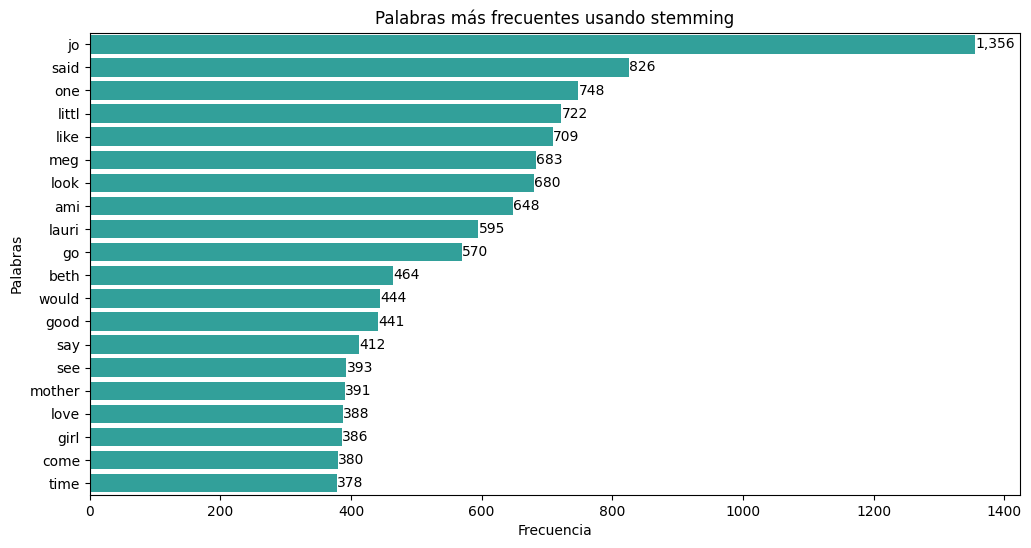

In [263]:
#Histograma de frecuencias de frecuencia_stems top 20
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
frecuencia_stems_top = dict(frecuencia_stems.most_common(20))
#plt.bar(frecuencia_stems_top.keys(), frecuencia_stems_top.values(), color='lightseagreen')
#plt.xlabel('Stems')
#plt.ylabel

#Convertir el diccinario en daata frame
frecuencia_stems_top_df = pd.DataFrame(list(frecuencia_stems_top.items()), columns=['stem', 'frequency'])



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Gráfica de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frecuencia_stems_top_df, x='frequency', y='stem', color='lightseagreen')

# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

# Título y etiquetas
plt.title('Palabras más frecuentes usando stemming')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.show()

## Frecuencia usando Lematización

In [265]:
import spacy
from collections import Counter

# Cargar el modelo en inglés de spaCy
nlp = spacy.load("en_core_web_sm")

# Texto de ejemplo
texto = " ".join(df_libro_fil['processed_text'][50:])

# Procesar el texto con spaCy
doc = nlp(texto)

# Lematizar las palabras y contar las frecuencias
lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
frecuencia_lemmas = Counter(lemas)

# Mostrar la frecuencia de las lemas
print("Frecuencia de lemas:", frecuencia_lemmas)


Frecuencia de lemas: Counter({'jo': 1356, 'say': 956, 'little': 722, 'like': 698, 'meg': 683, 'look': 662, 'amy': 648, 'come': 602, 'laurie': 595, 'good': 554, 'go': 513, 'know': 498, 'think': 471, 'beth': 464, 'mother': 391, 'girl': 386, 'old': 384, 'time': 371, 'tell': 362, 'feel': 360, 'ask': 350, 'march': 331, 'thing': 330, 'away': 327, 'get': 321, 'try': 317, 'love': 316, 'hand': 296, 'face': 292, 'young': 289, 'day': 289, 'find': 285, 'home': 277, 'dear': 275, 'take': 260, 'long': 259, 'shall': 247, 'eye': 243, 'heart': 239, 'way': 233, 'boy': 226, 'cry': 224, 'want': 223, 'begin': 223, 'help': 221, 'well': 219, 'see': 219, 'word': 215, 'give': 210, 'laugh': 210, 'head': 207, 'sit': 207, 'great': 203, 'let': 199, 'man': 197, 'work': 197, 'leave': 192, 'till': 190, 'happy': 186, 'turn': 185, 'lady': 179, 'new': 178, 'friend': 175, 'father': 174, 'wish': 174, 'mind': 171, 'child': 170, 'poor': 164, 'john': 163, 'hope': 158, 'minute': 157, 'people': 157, 'hard': 153, 'hear': 151, 's

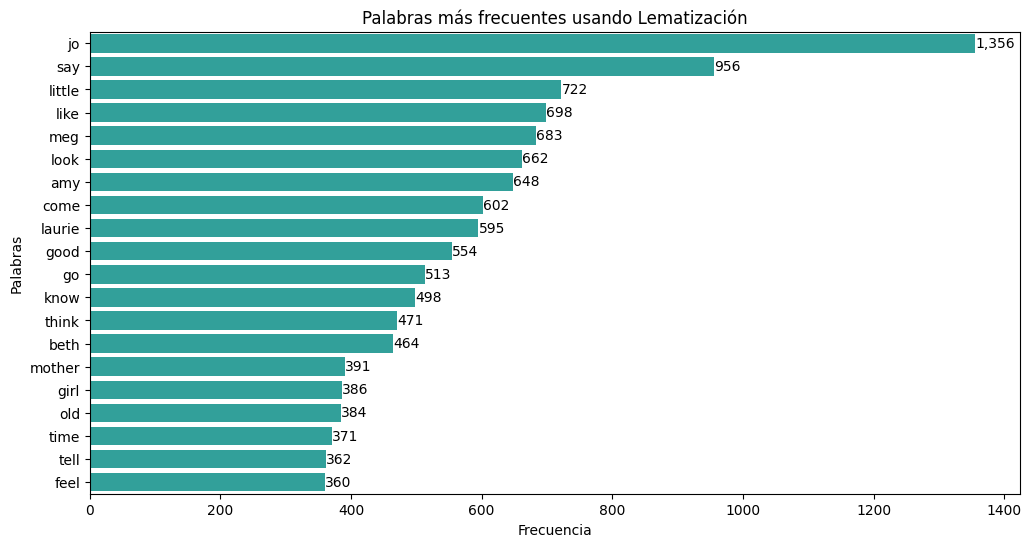

In [266]:
frecuencia_lemmas_top = dict(frecuencia_lemmas.most_common(20))
#plt.bar(frecuencia_stems_top.keys(), frecuencia_stems_top.values(), color='lightseagreen')
#plt.xlabel('Stems')
#plt.ylabel

#Convertir el diccinario en daata frame
frecuencia_lemmas_top_df = pd.DataFrame(list(frecuencia_lemmas_top.items()), columns=['lem', 'frequency'])



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Gráfica de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frecuencia_lemmas_top_df, x='frequency', y='lem', color='lightseagreen')

# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

# Título y etiquetas
plt.title('Palabras más frecuentes usando Lematización')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.show()

## N Gramas

In [288]:
#Buscar en donde dice el texto dice second charper
df_libro_fil2 = df_libro_fil.copy()
df_libro_fil2['text'] = df_libro_fil2['text'].str.lower()


,text,long,total_palabras,processed_text,punctuation_count


In [304]:
df_libro_fil2[df_libro_fil2['text'].str.contains('chapter one')]

,text,long,total_palabras,processed_text,punctuation_count
4,chapter one playing pilgrims,29,4,chapter one playing pilgrims,0
53,chapter one,11,2,chapter one,0


In [306]:
df_libro_fil2['text'][53:411]

,text
53,chapter one
54,playing pilgrims
55,"“christmas won’t be christmas without any presents,” grumbled jo, lying"
56,on the rug.
57,"“it’s so dreadful to be poor!” sighed meg, looking down at her old"
...,...
406,"and it had become a household custom, for the mother was a born singer."
407,the first sound in the morning was her voice as she went about the
408,"house singing like a lark, and the last sound at night was the same"
409,"cheery sound, for the girls never grew too old for that familiar"


In [323]:
capitulo1=df_libro_fil2['processed_text'][55:59]

In [352]:
from sklearn.feature_extraction.text import CountVectorizer

# Unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=5)
X = vectorizer.fit_transform(df_libro_fil2['text'][55:59])

# Convertir a DataFrame
ngrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(ngrams_df.head())

   any presents grumbled  presents grumbled jo  sighed meg looking  \
0                      1                     1                   0   
1                      0                     0                   0   
2                      0                     0                   1   
3                      0                     0                   0   

   so dreadful to  to be poor  
0               0           0  
1               0           0  
2               1           1  
3               0           0  


In [354]:
from nltk import ngrams

frase = ' '.join(capitulo1)
print(frase)
#frase=df_libro_fil["processed_text"].iloc[1]
print(frase)
n = 3 # un tri
bigramas = ngrams(frase.split(), n)
for gramas in bigramas:
    print (gramas)

christmas christmas without presents grumbled jo lying rug dreadful poor sighed meg looking old dress
christmas christmas without presents grumbled jo lying rug dreadful poor sighed meg looking old dress
('christmas', 'christmas', 'without')
('christmas', 'without', 'presents')
('without', 'presents', 'grumbled')
('presents', 'grumbled', 'jo')
('grumbled', 'jo', 'lying')
('jo', 'lying', 'rug')
('lying', 'rug', 'dreadful')
('rug', 'dreadful', 'poor')
('dreadful', 'poor', 'sighed')
('poor', 'sighed', 'meg')
('sighed', 'meg', 'looking')
('meg', 'looking', 'old')
('looking', 'old', 'dress')


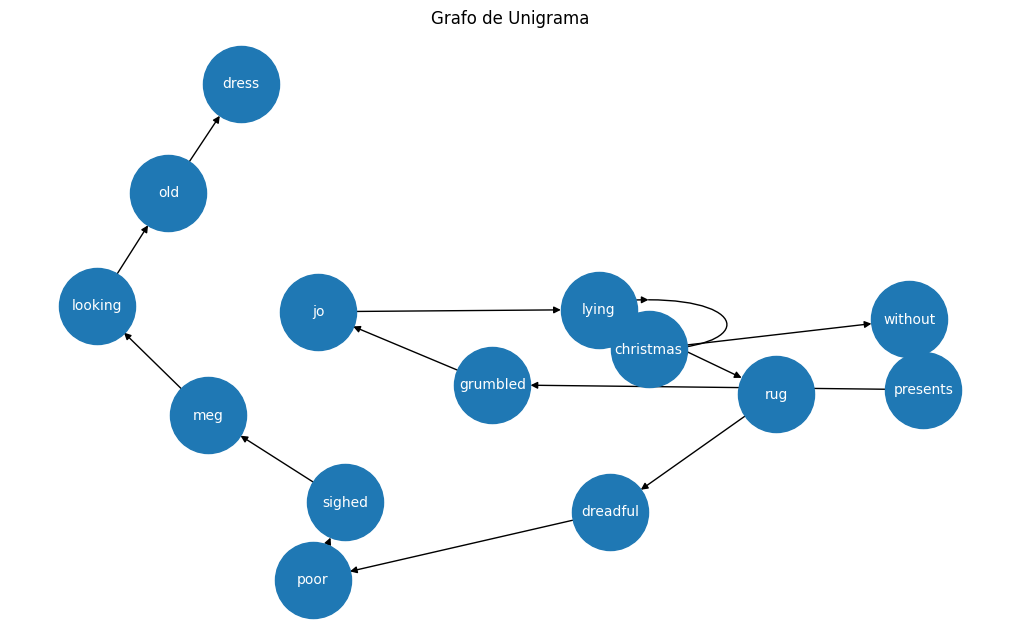

In [357]:
import networkx as nx
n=2
lsita_bigramas = list(ngrams(frase.split(), n))

G = nx.DiGraph()

for gram in lsita_bigramas:
    G.add_edge(gram[0], gram[1])

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, font_size=10, font_color='white')
plt.title("Grafo de Unigrama")
plt.show()

## Analisis de sentimiento

Polaridad: Un valor entre -1 (negativo) y 1 (positivo), donde valores cercanos a 1 indican sentimientos positivos.
Subjetividad: Un valor entre 0 (objetivo) y 1 (subjetivo), donde valores cercanos a 1 indican opiniones personales o emociones.

In [326]:
from textblob import TextBlob


# Crear el objeto TextBlob
blob = TextBlob(frase)

# Análisis de sentimiento (polaridad y subjetividad)
print("Polarity:", blob.sentiment.polarity) #sentimiento negativo
print("Subjectivity:", blob.sentiment.subjectivity) #Opiniones personales o emociones.


Polarity: -0.4333333333333333
Subjectivity: 0.6
